In [2]:
import pandas as pd #used to create and manupilate dataframe
import matplotlib.pyplot as plt #used for plotting our data
import numpy as np #for working on numpy arrays
#from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder #to catogorize non numerical data
from sklearn.pipeline import Pipeline #for forming pipeline so that we can apply functions in systamatic format
from sklearn.preprocessing import StandardScaler # used for scaling data for ease in calculation
from sklearn.impute import SimpleImputer #imputer is used to replace catagorical data by appropriate features
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder #also used to work on catagorical data
from sklearn.metrics import accuracy_score  #to find out accuracy of our model
housing= pd.read_csv("E:\programs\housing.csv") #our dataset being stored in housing

In [3]:
housing2=housing.copy()#making a copy of our data
print(housing2.head()) #we take a look at our data 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
print(housing2.info()) #tells about the number of entries we see 207 missing values in bedroom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
med=housing["total_bedrooms"].median() #As only total_bedroom has missing data we fill it with the median value
housing["total_bedrooms"].fillna(med,inplace=True)
print(housing.info()) #we see now all values are filled with median


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [6]:
housing2=housing #storing cleaned data in housing 2
housing2.describe() #shows count mean std min etc


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

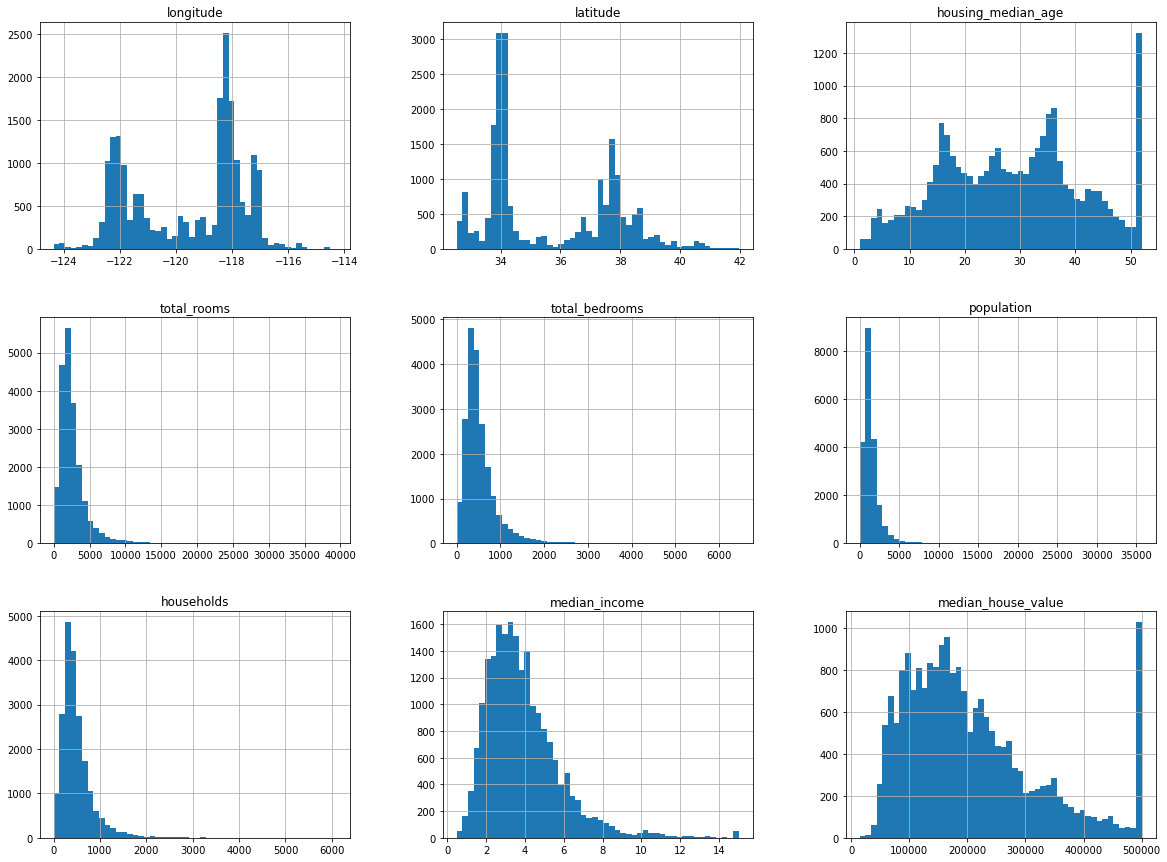

In [7]:
housing2.hist(bins=50, figsize=(20,15))


In [8]:
cormat=housing2.corr()   #storing different correlation in cormat
cormat["median_house_value"].sort_values(ascending=False) #viewing correlation with respect to median_housing_value


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:>

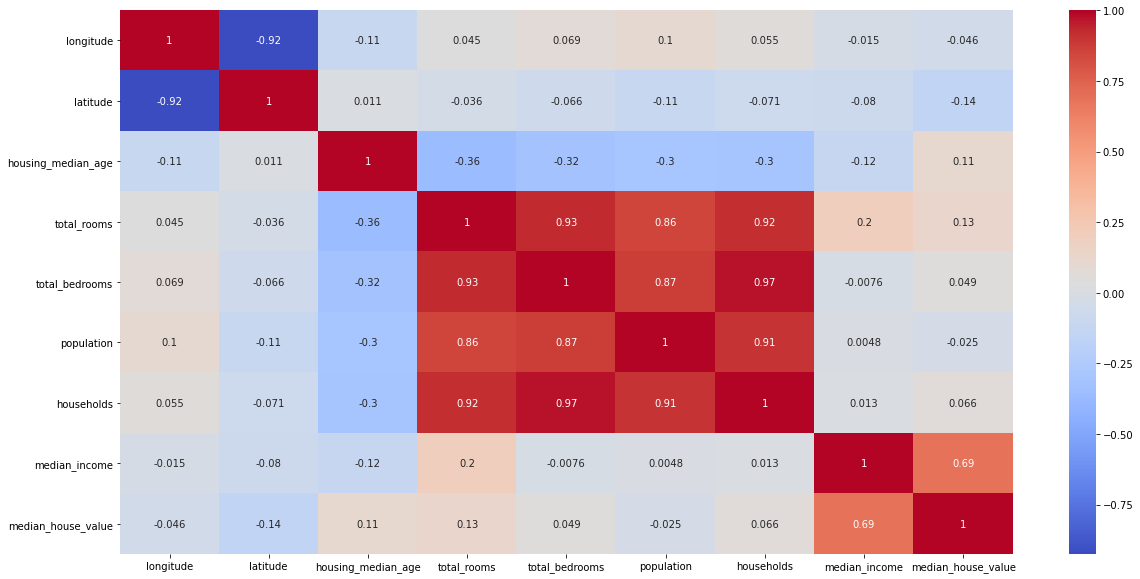

In [9]:
plt.figure(figsize=(20,10)) #plotting correlation
sns.heatmap(cormat, annot=True, cmap='coolwarm')


In [10]:
housing["med_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5]) # giving labels to med_cat according to its range
housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,med_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


<AxesSubplot:>

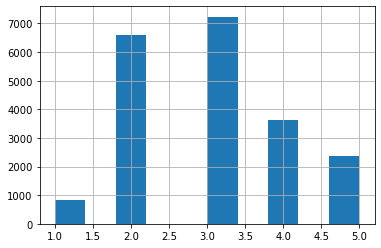

In [11]:
housing["med_cat"].hist() #we see all the values beyond 6 are now a part of 5


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #taking test set 20 percent and rest training
for train_ind, test_ind in split.split(housing, housing["med_cat"]):
    strainingset = housing.loc[train_ind]
    stestset = housing.loc[test_ind]


In [13]:
stestset["med_cat"].value_counts() / len(stestset)


3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: med_cat, dtype: float64

In [14]:
strainingset["med_cat"].value_counts() / len(strainingset)


3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: med_cat, dtype: float64

In [15]:
strainingset.count() #80 percent


longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16512
population            16512
households            16512
median_income         16512
median_house_value    16512
ocean_proximity       16512
med_cat               16512
dtype: int64

In [16]:
stestset.count() # 20 percent


longitude             4128
latitude              4128
housing_median_age    4128
total_rooms           4128
total_bedrooms        4128
population            4128
households            4128
median_income         4128
median_house_value    4128
ocean_proximity       4128
med_cat               4128
dtype: int64

In [17]:
for s in (strainingset, stestset):
    s.drop("med_cat", axis=1, inplace=True)


In [18]:
tracpy=strainingset.copy()
tracpy # copy of stratified training data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

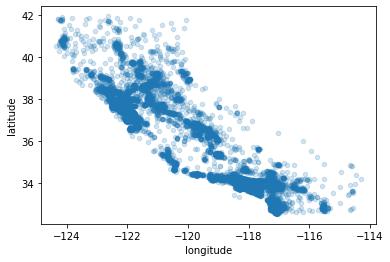

In [19]:
tracpy.plot(kind="scatter", x="longitude", y="latitude",alpha=.2) #we use alpha to distuinguish density


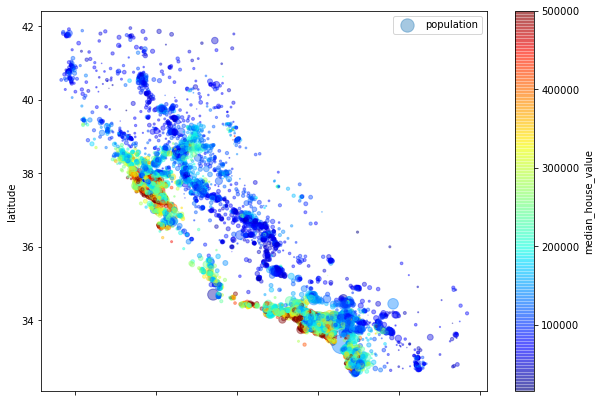

In [20]:
tracpy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=tracpy["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()


In [21]:
cor=tracpy.corr()
cor["median_house_value"].sort_values(ascending=False) #corrilation of training set


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047640
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [22]:
housing_traindata =strainingset.drop("median_house_value", axis=1) #removing our label from training set to train our model without knowing training labels
housing_labels = strainingset["median_house_value"].copy()
housing_numerical = housing_traindata.drop("ocean_proximity", axis=1)


In [23]:
housing_traindata  #data without labels


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [24]:
housing_labels


17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [25]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])


In [26]:
housingnumb = num_pipeline.fit_transform(housing_numerical)
housingnumb


array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.63621141,
        -0.42069842, -0.61493744],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.99833135,
        -1.02222705,  1.33645936],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.43363936,
        -0.0933178 , -0.5320456 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.60790363,
         0.71315642, -0.3167053 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.05717804,
        -0.37545069,  0.09812139],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.13515931,
         0.3777909 , -0.15779865]])

In [27]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_numerical)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])
housing_prepared = full_pipeline.fit_transform(housing_traindata)


In [28]:
from sklearn.linear_model import LinearRegression
lireg = LinearRegression() 
lireg.fit(housing_prepared, housing_labels)


LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error #imprting mean_squuared_error to see how much error the model gave
predic = lireg.predict(housing_prepared)
meansqerr = mean_squared_error(housing_labels, predic)
rootmeaner = np.sqrt(meansqerr) #from mean squared error finding root mean sq error
print(rootmeaner)


69050.93173494007


In [30]:
from sklearn.tree import DecisionTreeRegressor
destree = DecisionTreeRegressor()
destree.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [31]:
predic2 = destree.predict(housing_prepared)
meansqerr2 = mean_squared_error(housing_labels,predic2)
rootmeaner2 = np.sqrt(meansqerr2)
print(rootmeaner2)


0.0


In [32]:
from sklearn.ensemble import RandomForestRegressor

forestreg = RandomForestRegressor(n_estimators=50, random_state=42)
forestreg.fit(housing_prepared, housing_labels)


RandomForestRegressor(n_estimators=50, random_state=42)

In [33]:
predic3 = forestreg.predict(housing_prepared)
meansqerr3 = mean_squared_error(housing_labels, predic3)
rootmeaner3 = np.sqrt(meansqerr3)
print(rootmeaner3)


18833.334240289372


In [34]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(housing_prepared, housing_labels)


RandomForestRegressor(n_estimators=50, random_state=42)

In [35]:
X_test = stestset.drop("median_house_value", axis=1)
Y_test = stestset["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared


array([[ 0.59238393, -0.71074948,  0.02758786, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8571457 , -0.87445443,  0.8228579 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26268061, -0.66865392, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54242889, -0.68268578,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12690297, -0.77155418, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33261768,  0.53808541, -0.76768218, ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


47616.4587950604

In [37]:
print(final_predictions[:5])
print(Y_test[:5])


[480878.56 222810.   202986.   211036.   137236.  ]
5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
Name: median_house_value, dtype: float64


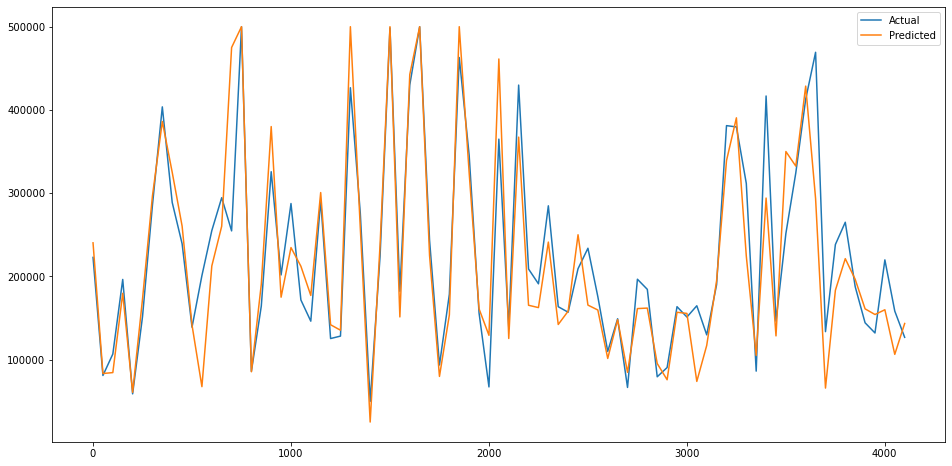

In [38]:
test = pd.DataFrame({'Predicted':final_predictions,'Actual':Y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[1::50])
plt.legend(['Actual','Predicted'])


In [39]:
from joblib import dump, load
dump(model, 'housingprediction.joblib') 


['housingprediction.joblib']

In [40]:
print("INPUTING CUSTOM DATA")


INPUTING CUSTOM DATA


In [41]:
print("HELLO PLEASE INPUT THE DATA ABOUT THE PROPERTY ")
seq=['longitude','latitude','housing_median_age','total_rooms',
               'total_bedrooms','population','households','median_income','ocean_proximity']
ar=[]
for i in range (7) :
    print("ENTER THE :",seq[i])
    k=int(input())
    ar.append(k)
print("ENTER THE :median_income")
y=float(input())
ar.append(k)
t=input("ENTER THE :ocean_proximity")
ar.append(t)

testingdata = {'longitude':[ar[0]],'latitude':[ar[1]],'housing_median_age':[ar[2]],'total_rooms':[ar[3]],
               'total_bedrooms':[ar[4]],'population':[ar[5]],'households':[ar[6]],'median_income':[ar[7]],'ocean_proximity':[ar[8]]}


HELLO PLEASE INPUT THE DATA ABOUT THE PROPERTY 
ENTER THE : longitude
120
ENTER THE : latitude
43
ENTER THE : housing_median_age
23
ENTER THE : total_rooms
5
ENTER THE : total_bedrooms
2
ENTER THE : population
5000
ENTER THE : households
500
ENTER THE :median_income
2.6843
ENTER THE :ocean_proximityINLAND


In [42]:
tesdf=pd.DataFrame(testingdata) #converting it to dataframe for feeding in the pipeline for transformation


In [43]:
tesdf


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,120,43,23,5,2,5000,500,500,INLAND


In [44]:
testtransform = full_pipeline.transform(tesdf)


In [45]:
ans=model.predict(testtransform)


In [46]:
print("PRICE SHOULD BE FOR CUSTOM DATA :",ans[0])


PRICE SHOULD BE FOR CUSTOM DATA : 390306.2
